In [34]:
import pandas as pd
import glob
import matplotlib as mpl

In [2]:
all_abund_df = {}
for file in glob.glob("*tab"):
    name=file.split('.')[0]
    all_abund_df[name]=pd.read_csv(file, sep='\t', index_col='Genome')

In [5]:
merged_DF=pd.concat(all_abund_df.values(), axis=1)

In [23]:
cols_call = merged_DF.columns[np.arange(9,8180,10)]
names = merged_DF.columns[np.arange(9,8180,10)].str.split(' ').str[0]

In [26]:
relative_abund = merged_DF[cols_call]

In [28]:
relative_abund.columns=names

In [30]:
relative_abund.to_csv('MAG_relative_abundance.tab', sep='\t')

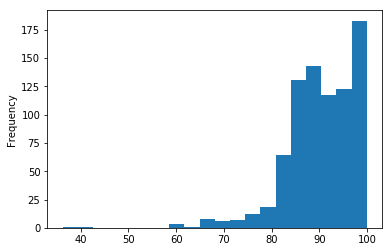

In [36]:
relative_abund.iloc[0].plot(kind='hist', bins=20)

In [45]:
from sklearn.preprocessing import StandardScaler
relative_abund=relative_abund.drop('unmapped')

In [46]:
features = relative_abund.columns

In [47]:
x = relative_abund.loc[:, features].values
# Separating out the target
y = relative_abund.index
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])


In [68]:
principalDf.index=y
principalDf['region']=principalDf.index.str.split('-').str[0]
principalDf['depth']=principalDf.index.str.split('-').str[2]


,pc1,pc2,region,depth
Genome,,,,
SPO-all-SRF-5-20-00_bin-8,-2.509023,-2.795008,SPO,SRF
MS-all-SRF-0-8-5-00_bin-278,-2.039997,-1.452391,MS,SRF
SPO-SPSG-MIX-0-8-5-00_bin-231,35.784801,92.638330,SPO,MIX
SPO-all-SRF-180-2000-00_bin-297,-1.848146,-1.765792,SPO,SRF
IO-all-MES-0-8-5-00_bin-251,-2.532557,-2.715608,IO,MES
SPO-all-SRF-20-180-00_bin-23,9.699153,-6.121346,SPO,SRF
SPO-SPSG-SRF-0-8-5-00_bin-299,-2.291915,-1.608848,SPO,SRF
IO-all-MES-0-8-5-00_bin-33,-2.516078,-2.641039,IO,MES
SPO-all-SRF-180-2000-00_bin-283,-2.535355,-2.797417,SPO,SRF


(-5, 40)

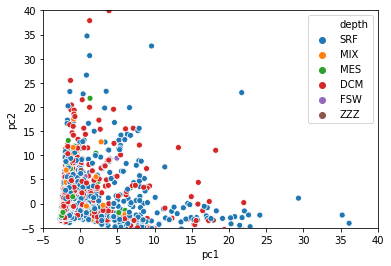